In [1]:
import sys, os
import attr
import random
from time import time
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rich.progress import track
from typing import OrderedDict
from functools import partial
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from torchvision.transforms import ToTensor

from kaokore.data import Kaokore, label_texts
# from kaokore.pytorch_references.transforms import ToTensor

In [2]:
category='gender'
label_texts = label_texts[category]

6756

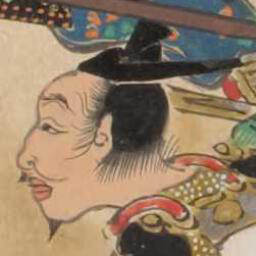

In [3]:
trn_ds = Kaokore(root='data', split='train', category='gender', transform=None)
print(len(trn_ds))
trn_ds[0][0]

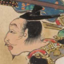

In [4]:
img = trn_ds[0][0].copy()
img.thumbnail([64, 64])
img

In [5]:
trn_ds = Kaokore(root='data', split='train', category='gender', transform=ToTensor())
print(len(trn_ds))
print(trn_ds[0])

6756

( 
 tensor ([[[ 0.1765 , 0.1804 , 0.2510 , ... , 0.7882 , 0.8118 , 0.8039 ] ,
 [ 0.2510 , 0.2000 , 0.2196 , ... , 0.7765 , 0.7922 , 0.7961 ] ,
 [ 0.3176 , 0.2275 , 0.1961 , ... , 0.7725 , 0.7804 , 0.8000 ] ,
 ... ,
 [ 0.7882 , 0.7882 , 0.7882 , ... , 0.8549 , 0.8510 , 0.8510 ] ,
 [ 0.7882 , 0.7882 , 0.7882 , ... , 0.8549 , 0.8549 , 0.8510 ] ,
 [ 0.7882 , 0.7882 , 0.7882 , ... , 0.8549 , 0.8549 , 0.8510 ]] ,

 [[ 0.2353 , 0.2196 , 0.2745 , ... , 0.7020 , 0.7255 , 0.7176 ] ,
 [ 0.2863 , 0.2235 , 0.2196 , ... , 0.6980 , 0.7059 , 0.7098 ] ,
 [ 0.3098 , 0.2118 , 0.1647 , ... , 0.6941 , 0.7020 , 0.7137 ] ,
 ... ,
 [ 0.6667 , 0.6667 , 0.6667 , ... , 0.8235 , 0.8196 , 0.8196 ] ,
 [ 0.6667 , 0.6667 , 0.6667 , ... , 0.8235 , 0.8235 , 0.8196 ] ,
 [ 0.6667 , 0.6667 , 0.6667 , ... , 0.8235 , 0.8235 , 0.8196 ]] ,

 [[ 0.1216 , 0.1137 , 0.1725 , ... , 0.6078 , 0.6314 , 0.6235 ] ,
 [ 0.1804 , 0.1216 , 0.1255 , ... , 0.6000 , 0.6118 , 0.6196 ] ,
 [ 0.2118 , 0.1137 , 0.0745 , ... , 0.5961 , 0.6078 , 0.6235 ] ,
 ... ,
 [ 0.4863 , 0.4863 , 0.4863 , ... , 0.7725 , 0.7765 , 0.7765 ] ,
 [ 0.4863 , 0.4863 , 0.4863 , ... , 0.7725 , 0.7804 , 0.7765 ] ,
 [ 0.4863 , 0.4863 , 0.4863 , ... , 0.7725 , 0.7804 , 0.7765 ]]]) ,
 0 
 )

In [6]:
trn_X = np.stack([s[0] for s in trn_ds]).reshape([len(trn_ds), -1])
trn_y = np.array([s[1] for s in trn_ds])

In [7]:
np.unique(trn_y, return_counts=True)

( array ([ 0 , 1 ]) , array ([ 5233 , 1523 ]))

In [8]:
# X, y = trn_X, trn_y
indices = npr.choice(trn_X.shape[0], 1000, replace=False)
X, y = trn_X[indices], trn_y[indices]
# plt.imshow(get_sprite_image(X[:9]), cmap='gray')

In [9]:
n_points = X.shape[0]
n_neighbors = 10
n_components = 2

In [10]:
def plot_embedding(_X, y, title=None, ax=None, **kwargs):
    data = pd.DataFrame(np.concatenate((_X, y[:, None]), axis=1), columns=['x1', 'x2', 'y'])
    data['label'] = data['y'].apply(lambda y: label_texts[int(y)])
    ax = ax or plt.gca()
    sns.scatterplot(x='x1', y='x2', hue='label', data=data, ax=ax, cmap=plt.cm.Spectral, **kwargs)
    # sns.scatterplot(data=data, x=0, y=1, hue=2, ax=ax, **kwargs)
    # ax.scatter(_X[:, 0], _X[:, 1], color=list(map(plt.cm.Dark2, y)), cmap=plt.cm.Spectral, **kwargs)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")
    ax.legend()

In [11]:
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors=n_neighbors,
              n_components=n_components,
              eigen_solver='auto')

methods = OrderedDict()
methods["LLE"] = LLE(method="standard")
# methods["LTSA"] = LLE(method="ltsa")
# methods["Hessian LLE"] = LLE(method="hessian")
methods["Modified LLE"] = LLE(method="modified")
methods["Isomap"] = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
methods["MDS"] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods["SE"] = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors
)
methods["t-SNE"] = manifold.TSNE(n_components=n_components, init="pca", random_state=0)

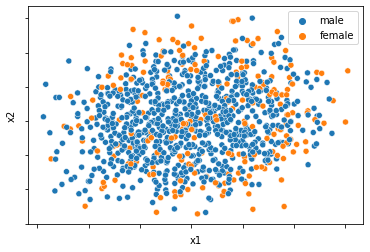

In [12]:
_X = methods["MDS"].fit_transform(X, y)
plot_embedding(_X, y)
plt.show()

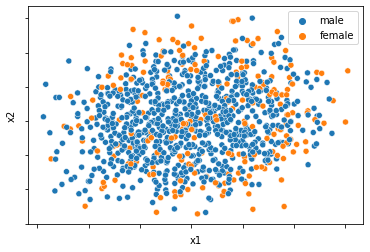

In [13]:
plot_embedding(_X, y)
plt.show()

LLE: 13 sec

Modified LLE: 15 sec

Isomap: 11 sec

MDS: 11 sec

SE: 8.6 sec

t-SNE: 16 sec

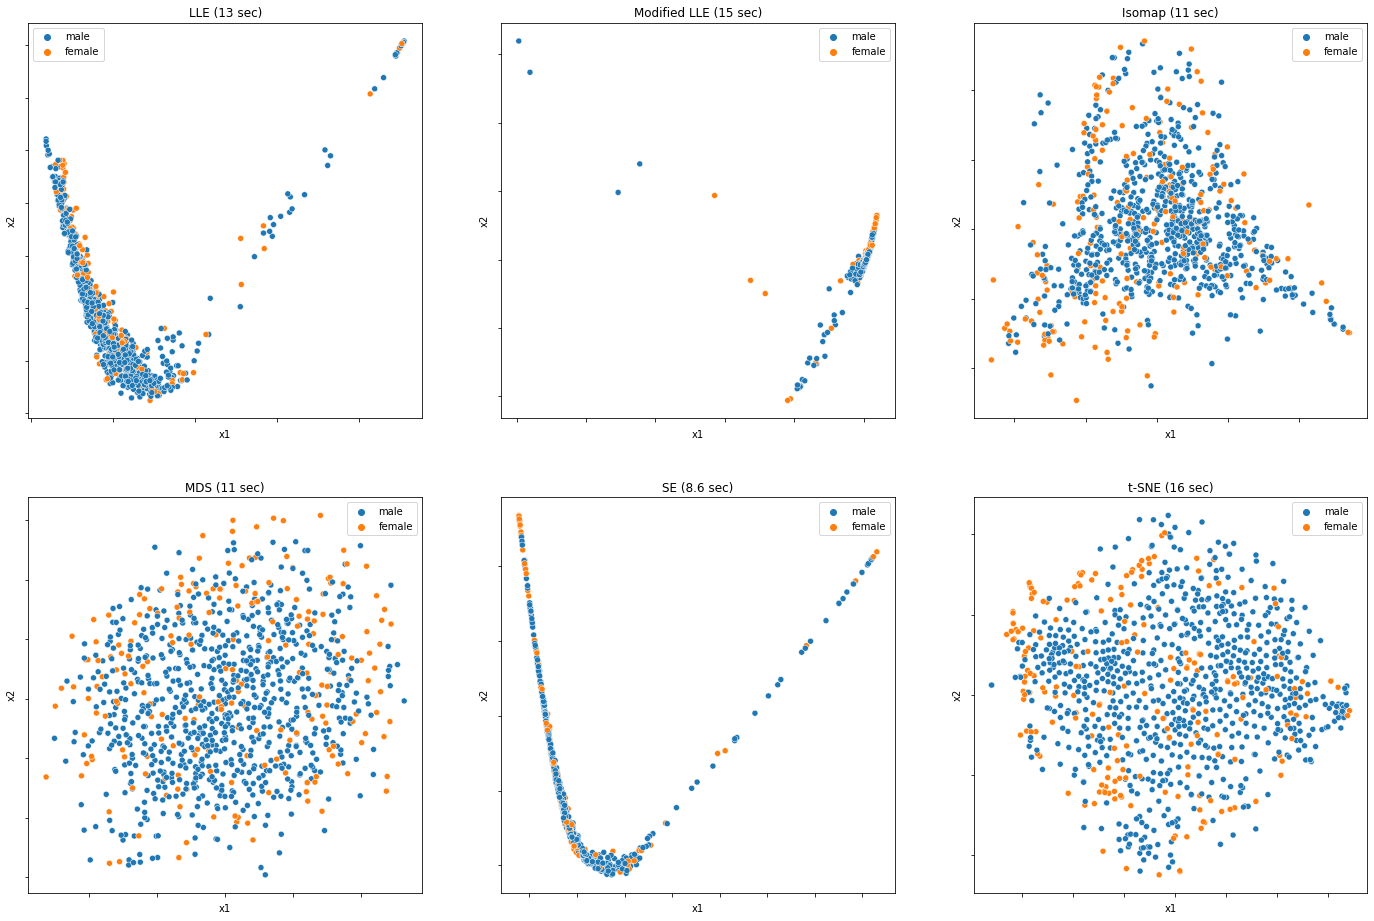

In [14]:
projections = OrderedDict()
n_rows, n_cols = 2, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 8))
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    _X = projections[label] = method.fit_transform(X, y)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = axes[i//n_cols, i%n_cols]
    plot_embedding(_X, y, title=f"{label} ({t1 - t0:.2g} sec)", ax=ax)
plt.show()